# Day 8
## Treetop Tree House
The expedition comes across a peculiar patch of tall trees all planted carefully in a grid. The Elves explain that a previous expedition planted these trees as a reforestation effort. Now, they're curious if this would be a good location for a tree house.

First, determine whether there is enough tree cover here to keep a tree house hidden. To do this, you need to count the number of trees that are visible from outside the grid when looking directly along a row or column.

The Elves have already launched a quadcopter to generate a map with the height of each tree (your puzzle input). For example:
```
30373
25512
65332
33549
35390
```
Each tree is represented as a single digit whose value is its height, where 0 is the shortest and 9 is the tallest.

A tree is visible if all of the other trees between it and an edge of the grid are shorter than it. Only consider trees in the same row or column; that is, only look up, down, left, or right from any given tree.

All of the trees around the edge of the grid are visible - since they are already on the edge, there are no trees to block the view. In this example, that only leaves the interior nine trees to consider:

- The top-left 5 is visible from the left and top. (It isn't visible from the right or bottom since other trees of height 5 are in the way.)
- The top-middle 5 is visible from the top and right.
- The top-right 1 is not visible from any direction; for it to be visible, there would need to only be trees of height 0 between it and an edge.
- The left-middle 5 is visible, but only from the right.
- The center 3 is not visible from any direction; for it to be visible, there would need to be only trees of at most height 2 between it and an edge.
- The right-middle 3 is visible from the right.
- In the bottom row, the middle 5 is visible, but the 3 and 4 are not.

With 16 trees visible on the edge and another 5 visible in the interior, a total of 21 trees are visible in this arrangement.

Consider your map; **how many trees are visible from outside the grid?**

## Part 1

### Prepare the dataset
Initial approach: use numpy array

In [1]:
with open("tree_heights.txt", "r") as f:
    trees_txt = f.read()

In [36]:
trees_txt = trees_txt.rstrip("\n")

In [37]:
print(trees_txt)

020110220332333020110144320304042020444223003535441353331002333431100300241023221210123003331021020
002120010112022233203323334422340102033151553341235324543343233301202102130210343113312320222102020
000000000301021002423224442341031145215244543444223314545524515335404222310244314423023331200102012
011200302010212334422213334343335452314532352111122533515334412241512412033340322004232020212310011
110111200102310120411101020333232255345143342245212323552344535253214434143032323213200301101020121
122001020113011314043121413025543341512335111452355331355351515421515411500421204113413212021112302
011210211003201420103123304513544114145311452334355144111521441452154223512022101102111221311323311
011030200312240341224434214241313322323544154242345656634321531531424124544551344224331443202111303
031023120224010220144244342511241334331166432443322363352643453525244443222142533014331212133113031
331033331100013013431114214253543323143222523423236646456363626622312534521454454123324132323233200


In [5]:
import numpy as np

In [38]:
# array size
len(trees_txt.split("\n")[0]), len(trees_txt.split("\n"))

(99, 99)

[Stack Overflow](https://stackoverflow.com/questions/35612235/how-to-read-numpy-2d-array-from-string)

In [30]:
tree_array = np.array([i for i in trees_txt.replace("\n", "")], dtype=int)

In [40]:
tree_array = tree_array.reshape([99, 99])

In [41]:
tree_array

array([[0, 2, 0, ..., 0, 2, 0],
       [0, 0, 2, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 2],
       ...,
       [0, 2, 2, ..., 1, 0, 0],
       [1, 2, 2, ..., 2, 1, 1],
       [1, 2, 2, ..., 2, 2, 1]])

### Visualisation
With Seaborn

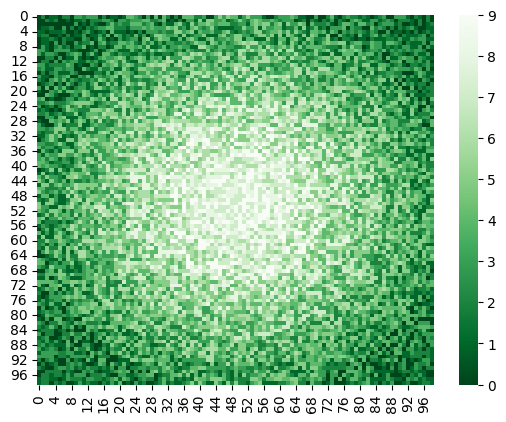

In [45]:
# library
import seaborn as sns

# Default heatmap
p1 = sns.heatmap(tree_array, cmap="Greens_r")

### Find visibility

In [137]:
visibility_map = np.zeros([99, 99], dtype=int)

In [138]:
visibility_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [139]:
# Visibility is 1 at all boundaries
visibility_map[0] = 1
visibility_map[-1] = 1
visibility_map[:, 0] = 1
visibility_map[:, -1] = 1

In [140]:
visibility_map

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [141]:
visibility_map.shape == tree_array.shape

True

#### Test with example first

In [71]:
example_txt = """30373
25512
65332
33549
35390
""".replace("\n", "")
example_array = np.array([i for i in example_txt], dtype=int)
example_array = example_array.reshape([5, 5])
example_array

array([[3, 0, 3, 7, 3],
       [2, 5, 5, 1, 2],
       [6, 5, 3, 3, 2],
       [3, 3, 5, 4, 9],
       [3, 5, 3, 9, 0]])

In [110]:
li, co = 1, 1
example_array[li, co]

5

In [111]:
left_array = example_array[li, :co]
right_array = example_array[li, co+1:]
top_array = example_array[:li, co]
bottom_array = example_array[li+1:, co]
print(f"Left: {left_array}  Right: {right_array}  Top: {top_array}  Bottom: {bottom_array}")

Left: [2]  Right: [5 1 2]  Top: [0]  Bottom: [5 3 5]


In [112]:
all(i for i in left_array < example_array[li, co])

True

In [113]:
all(i for i in right_array < example_array[li, co])

False

In [114]:
all(i for i in top_array < example_array[li, co])

True

In [115]:
all(i for i in bottom_array < example_array[li, co])

False

### Line of Sight function

In [129]:
def line_of_sight(trees:np.array, line:int, column:int):
    # take the arrays from left, right, top and bottom from array trees[line, column]
    left_array = trees[line, :column]
    right_array = trees[line, column+1:]
    top_array = trees[:line, column]
    bottom_array = trees[line+1:, column]
    # return dictionary
    return {"left": left_array, "right": right_array, 
            "top": top_array, "bottom": bottom_array}

### Visibility function

In [134]:
def find_visibility(trees:np.array, visibility:np.array):
    # iterate trees map from the second row (line or column)
    for line in range(1, trees.shape[0]-1):
        for column in range(1, trees.shape[1]-1):
            # obtain the visibility dictionary
            tree_visibility = line_of_sight(trees, line, column)
            # check if visibilities are true
            left_vis = all(i for i in tree_visibility["left"] < trees[line, column])
            right_vis = all(i for i in tree_visibility["right"] < trees[line, column])
            top_vis = all(i for i in tree_visibility["top"] < trees[line, column])
            bottom_vis = all(i for i in tree_visibility["bottom"] < trees[line, column])
            # if any visibility is true, mark the visibility array
            if any(i for i in [left_vis, right_vis, top_vis, bottom_vis]):
                visibility[line, column] = 1
                print(f"[{line}, {column}] is visible")
    # return visibility array
    return visibility

### Run search for visibility, and visualise output

In [142]:
visibility_map = find_visibility(tree_array, visibility_map)

[1, 2] is visible
[1, 4] is visible
[1, 15] is visible
[1, 16] is visible
[1, 17] is visible
[1, 18] is visible
[1, 20] is visible
[1, 21] is visible
[1, 25] is visible
[1, 26] is visible
[1, 27] is visible
[1, 28] is visible
[1, 30] is visible
[1, 33] is visible
[1, 35] is visible
[1, 40] is visible
[1, 42] is visible
[1, 43] is visible
[1, 46] is visible
[1, 50] is visible
[1, 53] is visible
[1, 54] is visible
[1, 55] is visible
[1, 56] is visible
[1, 57] is visible
[1, 58] is visible
[1, 59] is visible
[1, 66] is visible
[1, 68] is visible
[1, 71] is visible
[1, 75] is visible
[1, 78] is visible
[1, 79] is visible
[1, 80] is visible
[1, 83] is visible
[1, 84] is visible
[1, 87] is visible
[1, 88] is visible
[1, 92] is visible
[1, 93] is visible
[1, 95] is visible
[1, 97] is visible
[2, 9] is visible
[2, 18] is visible
[2, 19] is visible
[2, 24] is visible
[2, 25] is visible
[2, 28] is visible
[2, 34] is visible
[2, 35] is visible
[2, 38] is visible
[2, 41] is visible
[2, 56] is visi

In [143]:
visibility_map

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

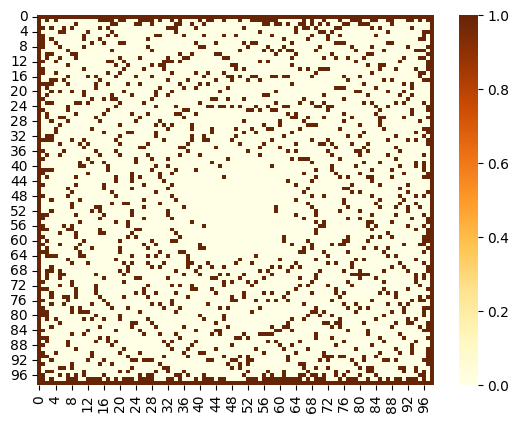

In [148]:
p2 = sns.heatmap(visibility_map, cmap="YlOrBr")

### How many trees are visible from outside the grid?

In [149]:
visibility_map.sum()

1805

#### 1805
That's the right answer! You are one gold star closer to collecting enough star fruit.

---

Your puzzle answer was 1805.

The first half of this puzzle is complete! It provides one gold star: *

## Part Two

Content with the amount of tree cover available, the Elves just need to know the best spot to build their tree house: they would like to be able to see a lot of trees.

To measure the viewing distance from a given tree, look up, down, left, and right from that tree; stop if you reach an edge or at the first tree that is the same height or taller than the tree under consideration. (If a tree is right on the edge, at least one of its viewing distances will be zero.)

The Elves don't care about distant trees taller than those found by the rules above; the proposed tree house has large eaves to keep it dry, so they wouldn't be able to see higher than the tree house anyway.

In the example above, consider the middle 5 in the second row:
```
30373
25512
65332
33549
35390
```
- Looking up, its view is not blocked; it can see 1 tree (of height 3).
- Looking left, its view is blocked immediately; it can see only 1 tree (of height 5, right next to it).
- Looking right, its view is not blocked; it can see 2 trees.
- Looking down, its view is blocked eventually; it can see 2 trees (one of height 3, then the tree of height 5 that blocks its view).

A tree's scenic score is found by multiplying together its viewing distance in each of the four directions. For this tree, this is 4 (found by multiplying 1 * 1 * 2 * 2).

However, you can do even better: consider the tree of height 5 in the middle of the fourth row:
```
30373
25512
65332
33549
35390
```
- Looking up, its view is blocked at 2 trees (by another tree with a height of 5).
- Looking left, its view is not blocked; it can see 2 trees.
- Looking down, its view is also not blocked; it can see 1 tree.
- Looking right, its view is blocked at 2 trees (by a massive tree of height 9).

This tree's scenic score is 8 (2 * 2 * 1 * 2); this is the ideal spot for the tree house.

Consider each tree on your map. **What is the highest scenic score possible for any tree?**

### Scenic score

In [217]:
def viewing_distance(array, height):
    # iterate array
    for i in range(0, len(array)):
        # if value greater or equal than height, return array length up to this point
        if array[i] >= height:
            return len(array[:i+1])
    # otherwise return the whole original array length
    return len(array)

In [230]:
def scenic_score(sightline, height):
    # define viewing distances
    distance_left = viewing_distance(sightline["left"][::-1], height)
    distance_right = viewing_distance(sightline["right"], height)
    distance_top = viewing_distance(sightline["top"][::-1], height)
    distance_bottom = viewing_distance(sightline["bottom"], height)
    # calculate the product of them (if greater than zero)
    score = np.prod([i for i in [distance_left, distance_right, distance_top, distance_bottom] if i > 0])
    # return
    return score

In [245]:
def calculate_scenic_score(trees:np.array):
    # initiate scenic array
    scenic_array = np.zeros(trees.shape, dtype=int)
    # iterate trees array
    for line in range(0, trees.shape[0]):
        for column in range(0, trees.shape[1]):
            # identify scenic score
            this_score = scenic_score(line_of_sight(trees, line, column), trees[line, column])
            # stamp the score on the scenic array
            scenic_array[line, column] = this_score
    # return array
    return scenic_array

### Run and visualise

In [246]:
scenic_array = calculate_scenic_score(tree_array)

In [247]:
scenic_array

array([[ 1, 25,  1, ...,  1,  3,  1],
       [ 1,  1, 16, ...,  1,  6,  1],
       [ 1,  1,  1, ...,  1,  2, 18],
       ...,
       [ 1,  3,  2, ...,  2,  1,  1],
       [ 3,  1,  5, ..., 16,  3,  3],
       [ 1,  1,  2, ...,  4,  4,  1]])

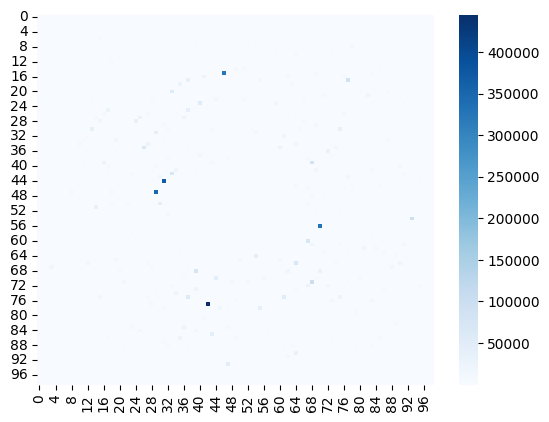

In [249]:
p3 = sns.heatmap(scenic_array, cmap="Blues")

In [250]:
scenic_array.max()

444528

In [253]:
np.where(scenic_array == scenic_array.max())

(array([77]), array([42]))

In [254]:
scenic_array[77, 42]

444528

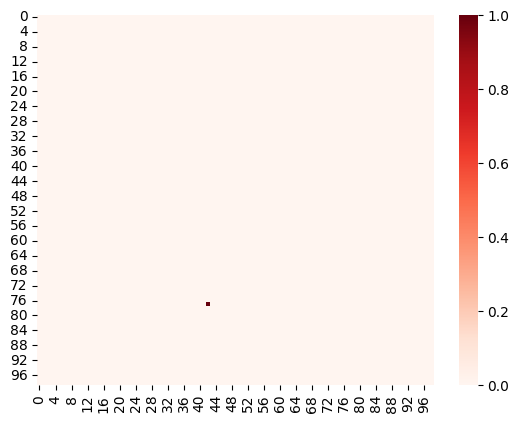

In [258]:
the_best_spot = np.zeros(scenic_array.shape)
the_best_spot[77, 42] = 1
p4 = sns.heatmap(the_best_spot, cmap="Reds")

#### 444528

---

That's the right answer! You are one gold star closer to collecting enough star fruit.

You have completed Day 8!